# Daniel Lupercio HW4

## Apply boosting, bagging, and random forests to the OJ data set  - the data and a short description are attached. Be sure to fit all the models on a training set and to evaluate their performance on a test set.

In [1]:
%load_ext autoreload
%autoreload 2
import sys

In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tree plotting
import pydot
from IPython.display import Image
import graphviz 
#from sklearn.externals.six import StringIO  
from io import StringIO  

# Model selection
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Trees
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

%matplotlib inline
plt.style.use('seaborn-white')

In [3]:
oj_df = pd.read_csv("/Users/daniel421/Desktop/STAT_724/ISLR_data/OJ.csv", index_col = 0)

In [4]:
oj_df['Store7'] = oj_df['Store7'].map({'Yes':1, "No":0})
oj_df['Purchase'] = oj_df['Purchase'].map({'CH': 1, 'MM':0})
oj_df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
2,1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
3,1,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
4,0,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
5,1,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [5]:
X = oj_df.drop('Purchase', axis = 1)
y = oj_df.Purchase

In [6]:
X.shape

(1070, 17)

In [7]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#X_train, X_test, y_train, y_test = train_test_split(oj_df.drop(['Purchase'], axis=1), 
                                                    #oj_df[['Purchase']])

### Random Forest: using all features

In [9]:
regr1 = RandomForestRegressor(max_features = 17, random_state = 1 )
regr1.fit(X_train, y_train)

RandomForestRegressor(max_features=17, random_state=1)

Text(0, 0.5, 'y_test')

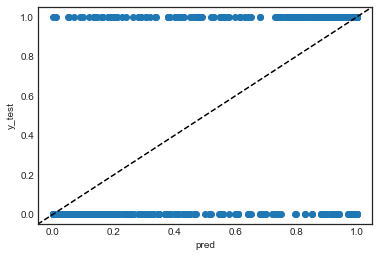

In [10]:
pred = regr1.predict(X_test)
plt.scatter(pred, y_test, label = 'Purchase')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [11]:
print("Test MSE is: ", mean_squared_error(y_test, pred))

Test MSE is:  0.14918441017335282


### Bagging: Using all features

In [12]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor(random_state=1)
bagging.fit(X=X_train, y=y_train.values.ravel())
p = bagging.predict(X_test)
print("Test MSE is: " + str(mean_squared_error(p, y_test)))

Test MSE is: 0.1625133644859813


### Boosting: Using all features

In [13]:
regr2 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr2.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=1)

In [14]:
p2 = regr2.predict(X_test)
print('Test MSE is: ' + str(mean_squared_error(p2, y_test)))

Test MSE is: 0.13162753964955742


## How accurate are the results compared to simple methods like a single tree or a logistic regression (you need to fit one of these 2 models to compare to)? Which of the approaches yields the best performance?

In [15]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
lr = LogisticRegression()

In [17]:
model_lr = lr.fit(X_train, y_train)

/Users/daniel421/Desktop/STAT_724/ds_724/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
score = lr.score(X_test, y_test)
print(score)

0.8205607476635514


In [19]:
p3 = lr.predict(X_test)
print('Test MSE is: ' + str(mean_squared_error(p3, y_test)))

Test MSE is: 0.17943925233644858


#### The model with the lowest MSE on the testing observations, is the boosting model with all features. At approximately 0.13. When implementing a logistic regression, this model produced an MSE of approximately 0.18.